# Hands-on-2 
## Task 2
### In this task you will implement reservoir sampling algorithm
* Implement the reservoir sampling algorithm from the lecture on iris data

In [54]:
import csv
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [55]:
def load_iris_data(filename):
    records = []
    with open(filename, 'rt') as csvfile:
        csvreader = csv.reader(csvfile, delimiter=',')
        for row in csvreader:
            if len(row) == 5:  # if we have 4 fields in that line
                records.append({
                   float(row[0]),
                    float(row[1]),
                    float(row[2]),
                    float(row[3]),
                    row[4]
                })
    return records


#Load the Iris data as pandas dataframe
iris_data =  pd.read_csv("../hands-on-1/data/iris.data", names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])

In [56]:
len(iris_data)

150

In [57]:
c = []
for i in range(len(iris_data)):
    if i in range(0, 50):      # Iris Setosa
        c.append("blue")
    elif i in range(50, 100):  # Iris Versicolor
        c.append("green")
    else:                      # Iris Virginica
        c.append("red")
iris_data['color'] = c

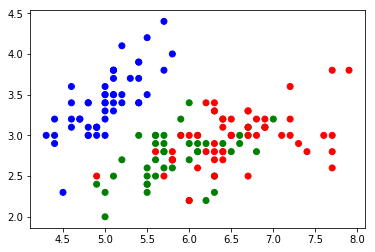

In [58]:
def plotIris(data):
    plt.scatter(data['sepal_length'], data['sepal_width'], c=data['color'])
    plt.show()
plotIris(iris_data)

In [59]:
#Shuffle the data
iris_data_shuffled = iris_data.sample(frac=1)

In [61]:
def getDataFrameFromArray(dataArray):
    return pd.DataFrame(data=dataArray,    # values
                 columns=["sepal_length", "sepal_width", "petal_length", "petal_width", "class", 'color'])  # 1st row as the column names

In [66]:
def reservoirSample(data, r):
    reservoir = []
    for i, element in enumerate(data.values):
#         print(element)
        if i+1<= r:
            reservoir.append(element)
        else:
            probability = r/(i+1)
            if random.random() < probability:
                # Select item in stream and remove one of the k items already selected
                 reservoir[random.choice(range(0,k))] = element
        #Print every 20 iterations
        if len(reservoir) == 20 and i % 20 == 0:
#             print(reservoir)
            plotIris(getDataFrameFromArray(reservoir))

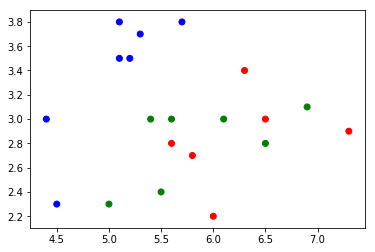

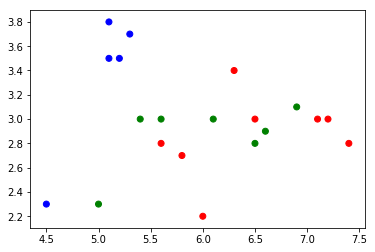

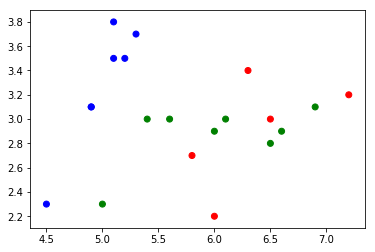

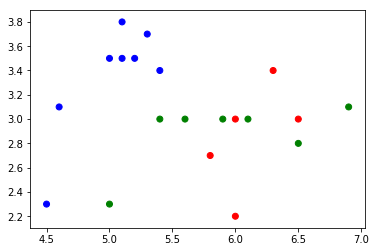

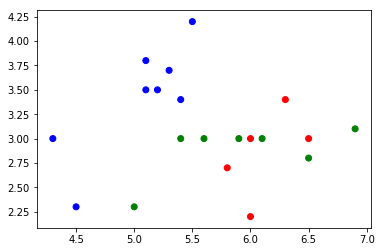

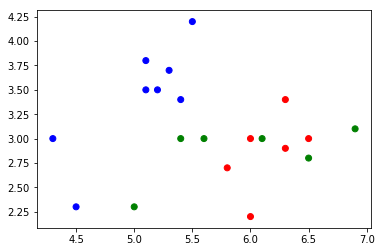

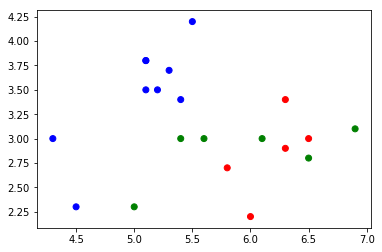

In [67]:
r=20
reservoirSample(iris_data_shuffled, r)